In [ ]:
!pip install simpful

In [ ]:
from simpful import *

# Create a fuzzy system object
FS = FuzzySystem()

# Define membership functions for Height using Triangular_MF
h1 = FuzzySet(function=Triangular_MF(a=140, b=150, c=160), term="short")  # Triangular MF: Peak at 0, ends at 5
h2 = FuzzySet(function=Triangular_MF(a=160, b=170, c=180), term="medium")  # Triangular MF: Peak at 5, range 0-10
h3 = FuzzySet(function=Triangular_MF(a=180, b=190, c=200), term="tall")  # Triangular MF: Peak at 10, starts at 5
FS.add_linguistic_variable("Height", LinguisticVariable([h1, h2, h3], concept="Height"))


# Define membership functions for Weight using Triangular_MF
w1 = FuzzySet(function=Triangular_MF(a=40, b=50, c=60), term="low")  # Triangular MF: Peak at 0, ends at 5
w2 = FuzzySet(function=Triangular_MF(a=60, b=70, c=80), term="optimal")  # Triangular MF: Peak at 5, range 2-8
w3 = FuzzySet(function=Triangular_MF(a=80, b=90, c=100), term="high")  # Triangular MF: Peak at 10, starts at 5
FS.add_linguistic_variable("Weight", LinguisticVariable([w1, w2, w3], concept="Weight"))

# Define crisp outputs for the rules
FS.set_crisp_output_value("healthy", 90)  # Constant output for "low"
FS.set_crisp_output_value("unhealthy", 10)  # Linear output for "average"
FS.set_crisp_output_value("somewhat_healthy", 70)  # Constant output for "high"
FS.set_crisp_output_value("less_healthy", 50)  # Constant output for "high"


# Define the Sugeno output function for "high"
FS.set_output_function("high", "Food+Service+5")  # Linear output function for "high"

# Define the rules
R1 = "IF (Height IS short) OR (Weight IS high) THEN (Healthiness IS unhealthy)"
R2 = "IF (Height IS tall) AND (Weight IS optimal) THEN (Healthiness IS healthy)"
R3 = "IF (Height IS medium) OR (Weight IS high) THEN (Healthiness IS somewhat_healthy)"
R4 = "IF (Height IS medium) OR (Weight IS low) THEN (Healthiness IS less_healthy)"

FS.add_rules([R1, R2, R3, R4])
# FS.add_linguistic_variable("ExampleVariable", LinguisticVariable([A1, A2, A3], universe_of_discourse=[0, 20]))


# Set the input variables
FS.set_variable("Height", 175)  # Service Quality = 7
FS.set_variable("Weight", 85)  # Food Quality = 8

# Perform Sugeno inference and print output
output = FS.Sugeno_inference(["Healthiness"])
print("Sugeno inference result:", output)


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type
Sugeno inference result: {'Healthiness': 43.333333333333336}


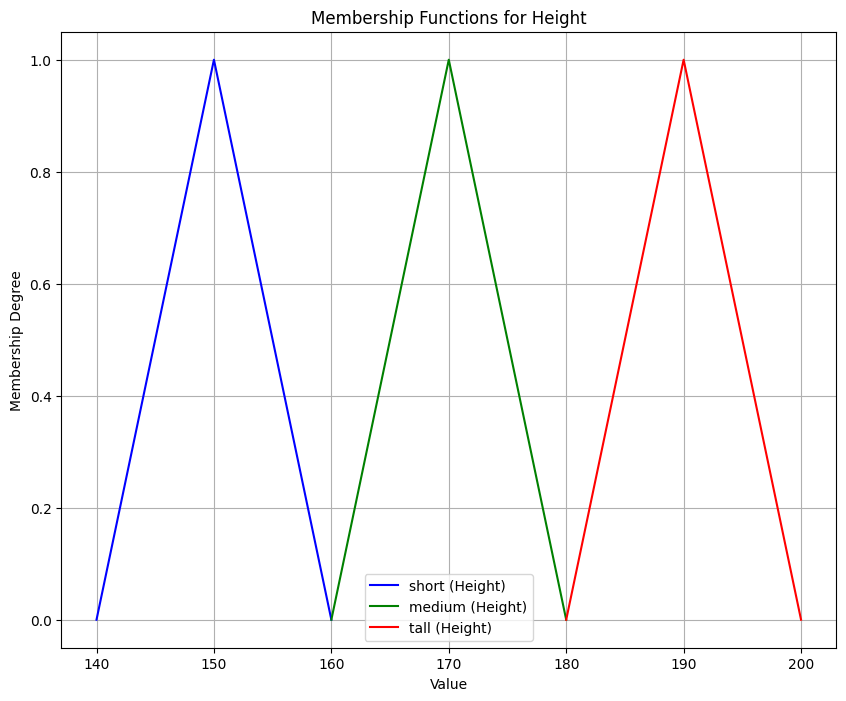

In [ ]:
# Create the plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot Service Quality (Input)
plt.plot([140, 150, 160], [0, 1, 0], label="short (Height)", color="blue")
plt.plot([160, 170, 180], [0, 1, 0], label="medium (Height)", color="green")
plt.plot([180, 190, 200], [0, 1, 0], label="tall (Height)", color="red")

plt.title("Membership Functions for Height")
plt.xlabel("Value")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()


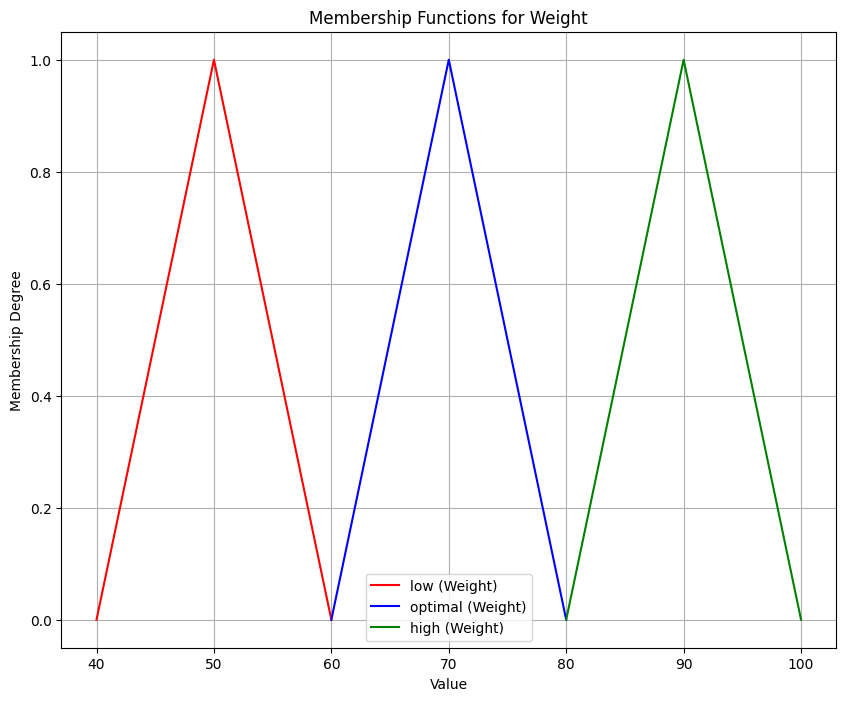

In [ ]:
# Create the plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot Service Quality (Input)
plt.plot([40, 50, 60], [0, 1, 0], label="low (Weight)", color="red")
plt.plot([60, 70, 80], [0, 1, 0], label="optimal (Weight)", color="blue")
plt.plot([80, 90, 100], [0, 1, 0], label="high (Weight)", color="green")

plt.title("Membership Functions for Weight")
plt.xlabel("Value")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()
